# Готовим данные для домашки

In [61]:
import pandas as pd
from datetime import datetime

air_df = pd.read_csv('air_quality.csv', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем 
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df.tail(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ts
9352,04/04/2005,10.00.00,"3,1",1314,-200,"13,5",1101,472,539,190,1374,1729,"21,9","29,3","0,7568",2005-04-04 10:00:00
9353,04/04/2005,11.00.00,"2,4",1163,-200,"11,4",1027,353,604,179,1264,1269,"24,3","23,7","0,7119",2005-04-04 11:00:00
9354,04/04/2005,12.00.00,"2,4",1142,-200,"12,4",1063,293,603,175,1241,1092,"26,9","18,3","0,6406",2005-04-04 12:00:00
9355,04/04/2005,13.00.00,"2,1",1003,-200,"9,5",961,235,702,156,1041,770,"28,3","13,5","0,5139",2005-04-04 13:00:00
9356,04/04/2005,14.00.00,"2,2",1071,-200,"11,9",1047,265,654,168,1129,816,"28,5","13,1","0,5028",2005-04-04 14:00:00


# Визуализация данных с помощью matplotlib 

## 1. Чтение текстовых файлов, файловые дескрипторы

### 1.1

**Простая задача** Выберите любой показатель загрязнённости воздуха (кроме NOx(GT), его мы использовали в туториале) и постройте график по 30 последним доступным наблюдениям.

*Результат выполнения*

Должен получиться такой же график, как для NOx(GT) (из второго урока данного модуля).
![title](https://248006.selcdn.ru/public/Data-science-2/img/PearsonFig.jpg)

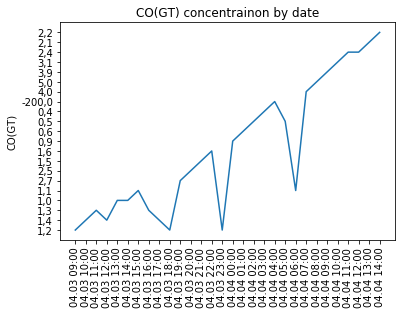

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

register_matplotlib_converters()
TOP=-30


# доступ к Figure и Subplot
fig, subplot = plt.subplots()
# формируем значения по оси  X
x_ticks = air_df['ts'].values[TOP:]
# формируем значения по оси Y
y_ticks = air_df['CO(GT)'].values[TOP:]
# график функции
subplot.plot(x_ticks, y_ticks)
# подписываем график
subplot.set_title('CO(GT) concentrainon by date')
# станавливаем название для оси  OX
subplot.set_ylabel('CO(GT)')
# подписи для оси Ох
x_labels = [pd.to_datetime(str(i)).strftime("%m.%d %H:%M") for i in air_df['ts'].values[TOP:]]
# добавляем подписи к осям
plt.xticks(x_ticks, rotation='vertical', labels=x_labels)
# устанавливаем границы по оси oX
x_min = air_df['ts'].values[0]
x_max = air_df['ts'].values[TOP-1]
 
plt.show()


### 1.2

**Задание среднего уровня** Постройте scatter plot между выбранным вами показателем и температурой (содержится в столбце `air_df['T]`).

([<matplotlib.axis.XTick at 0x1a0d2358388>,
 <a list of 30 Text xticklabel objects>)

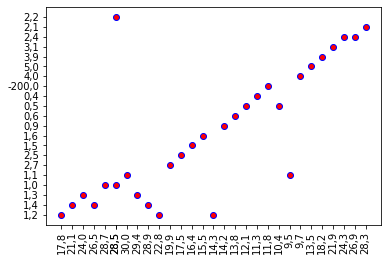

In [65]:
%matplotlib inline

register_matplotlib_converters()
TOP=-30
fig, subplot = plt.subplots()
x_values = air_df['T'].values[TOP:]
y_values = air_df['CO(GT)'].values[TOP:]
subplot.scatter(
    x=x_values, y=y_values, 
    marker='o', c='r', edgecolor='b'
)
plt.xticks(x_ticks1, rotation='vertical')

### 1.3

**Задание высокого уровня** Аналогично тому, как мы строили два графика рядом, отобразите на одном полотне следующие 4 графика:
<pre>
['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)'].
</pre>
По каждому показателю учитывайте только последние 30 наблюдений. Значения оси X используйте из столбца T.

*Ожидаемый результат*

![title](https://248006.selcdn.ru/public/Data-science-2/img/four_pack.png)

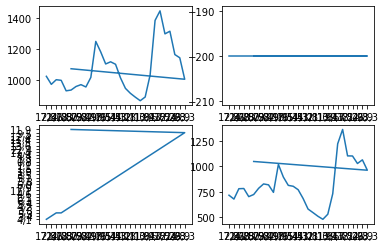

In [72]:
%matplotlib inline

register_matplotlib_converters()
TOP=-30


fig = plt.figure()
subplot1 = fig.add_subplot(221)
x1 = air_df['T'].values[TOP:]
y1 = air_df['PT08.S1(CO)'].values[TOP:]
subplot1.plot(x1, y1)

subplot2 = fig.add_subplot(222)
x2 = air_df['T'].values[TOP:]
y2 = air_df['NMHC(GT)'].values[TOP:]
subplot2.plot(x2, y2)

subplot3 = fig.add_subplot(223)
x3 = air_df['T'].values[TOP:]
y3 = air_df['C6H6(GT)'].values[TOP:]
subplot3.plot(x3, y3)

subplot4 = fig.add_subplot(224)
x4 = air_df['T'].values[TOP:]
y4 = air_df['PT08.S2(NMHC)'].values[TOP:]
subplot4.plot(x4, y4)